## RNN

- The Social Dilemma, a documentary-drama hybrid explores the dangerous human impact of social
networking, with tech experts sounding the alarm on their own creations as the tech experts sound
the alarm on the dangerous human impact of social networking. This dataset brings you thetwitter
responses made with the #TheSocialDilemma hashtag after watching the eye-opening
documentary "The Social Dilemma" released in an OTT platform(Netflix) on September 9th, 2020.
You can categorize the tweets into different groups to identify the sentiment of the users regarding
the documentary.
- Goal: You are hired as a deep learning engineer and you are asked to categorize the tweets into
three categories.
- Constraints: You should be using only RNN to generate results and should not be using any
LSTMor ML classification models to generate results.
- Data Description: The dataset was extracted using TwitterAPI, consisting of nearly 20000
tweets from twitter users all over the globe!
1. Attribute Information:
2. user_name - The name of the user, as they’ve defined it.
3. user_location - The user-defined location for this account’s profile.
4. user_description - The user-defined UTF-8 string describing their account.
5. user_created - Time and date, when the account was created.
6. user_followers - The number of followers an account currently has.
7. user_friends – The number of friends an account currently has.
8. user_favourites - The number of favorites an account currently has.
9. user_verified - When true, indicates that the user has a verified account.
10.date - UTC time and date when the Tweet was created.
11. hashtags - All the other hashtags posted in the tweet along with #TheSocialDilemma
12. source - Utility used to post the Tweet, Tweets from the Twitter website have a
sourcevalue – web
13. is_retweet - Indicates whether this Tweet has been Retweeted by the authenticating user.
14. clean_text – Cleaned text of the tweet.
15. Sentiment (target) - Indicates the sentiment of the tweet, consists of three categories:
Positive, neutral, and negative.


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
import warnings 
warnings.filterwarnings( "ignore")

In [2]:
# For Train test split
from sklearn.model_selection import train_test_split

In [3]:
# For pre-processing of text
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D

In [5]:
df_train=pd.read_csv(r'E:\Data Analytic\Madhu Kiran Sir\DeepLearning\DL Exam\DL + AI Exam Paper\Dataset\RNN\tweets_train.csv')

In [6]:
df_test=pd.read_csv(r'E:\Data Analytic\Madhu Kiran Sir\DeepLearning\DL Exam\DL + AI Exam Paper\Dataset\RNN\tweets_test.csv')

In [7]:
df_train.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text,Sentiment
0,Romy 👑,Bolton - England,"Tables turn, bridges burn, you live and learn.",2009-06-15 09:00:39,525,896,3854,False,2020-09-19 15:19:32,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TLynn Peterson,"Black Canyon City, Arizona",Acquired disability ♿ after an accident. Livin...,2013-05-29 00:17:46,5045,5374,48152,False,2020-09-13 00:31:46,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma If we don t agree on what is ...,Positive
2,Rutger Kosters,Netherlands,Cloud Solution Architect @NetApp | VCDX #209 |...,2014-10-07 09:34:10,574,251,1070,False,2020-09-09 21:10:33,['TheSocialDilemma'],Twitter for Android,False,Watching TheSocialDilemma scary to see social ...,Negative
3,IDFWU🗯🇿🇼🇿🇦,"East London, South Africa","YOU HAVE OPTIONS, YOU CAN’T JUST TAKE WHAT LIF...",2012-08-22 11:09:06,706,618,1320,False,2020-09-11 04:33:08,NaN,Twitter for Android,False,You check your social media before you pee in ...,Positive
4,Treebel,NaN,NaN,2010-09-25 07:25:31,9,13,55,False,2020-09-17 16:27:38,['thesocialdilemma'],Twitter for iPhone,False,watch thesocialdilemma and see what s actually...,Negative


In [8]:
df=df_train[['clean_text','Sentiment']]

In [9]:
df.head()

,clean_text,Sentiment
0,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TheSocialDilemma If we don t agree on what is ...,Positive
2,Watching TheSocialDilemma scary to see social ...,Negative
3,You check your social media before you pee in ...,Positive
4,watch thesocialdilemma and see what s actually...,Negative


In [10]:
df.shape

(17000, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clean_text  16992 non-null  object
 1   Sentiment   17000 non-null  object
dtypes: object(2)
memory usage: 265.8+ KB


In [12]:
df.isnull().sum()

clean_text    8
Sentiment     0
dtype: int64

In [13]:
df[df['clean_text'].isna()]

,clean_text,Sentiment
997,NaN,Neutral
2460,NaN,Neutral
4130,NaN,Neutral
5817,NaN,Neutral
9121,NaN,Neutral
9375,NaN,Neutral
15791,NaN,Neutral
16462,NaN,Neutral


In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

clean_text    0
Sentiment     0
dtype: int64

## Count Plot Of Sentiment

Text(0.5, 1.0, 'Count Plot of sentiment')

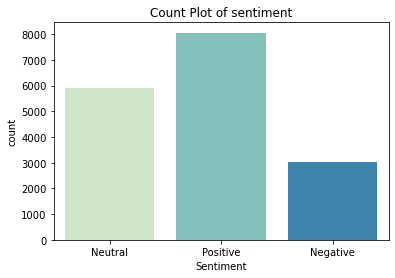

In [16]:
sns.countplot(df['Sentiment'], palette="GnBu") 
plt.title('Count Plot of sentiment')

In [17]:
df

,clean_text,Sentiment
0,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TheSocialDilemma If we don t agree on what is ...,Positive
2,Watching TheSocialDilemma scary to see social ...,Negative
3,You check your social media before you pee in ...,Positive
4,watch thesocialdilemma and see what s actually...,Negative
...,...,...
16995,Watching TheSocialDilemma,Neutral
16996,If you re not paying for the product you are t...,Neutral
16997,Watching TheSocialDilemma Let s see,Neutral
16998,Yes TheSocialDilemma what a perfect time to be...,Positive


## Basic Exploration in Text Mining

### Number of words

In [18]:
df['totalwords'] = [len(x.split()) for x in df['clean_text']]
df[['clean_text','totalwords']].head()

,clean_text,totalwords
0,TheSocialDilemma is an eye opener isn t it ple...,17
1,TheSocialDilemma If we don t agree on what is ...,24
2,Watching TheSocialDilemma scary to see social ...,16
3,You check your social media before you pee in ...,23
4,watch thesocialdilemma and see what s actually...,17


### Number of Characters- including spaces

In [19]:
df['char_count'] = df['clean_text'].str.len()
df[['clean_text','char_count']].head()

,clean_text,char_count
0,TheSocialDilemma is an eye opener isn t it ple...,90
1,TheSocialDilemma If we don t agree on what is ...,109
2,Watching TheSocialDilemma scary to see social ...,92
3,You check your social media before you pee in ...,114
4,watch thesocialdilemma and see what s actually...,89


### Average Word Length

In [20]:
def avg_word(sentence):
    words = sentence.split() #splitting the words separately from the input taken
    return (sum(len(word) for word in words)/len(words)) # getting the average number of words in the each of the entries

df['avg_word'] = df['clean_text'].apply(lambda x: avg_word(x))
df[['clean_text','avg_word']].head()

,clean_text,avg_word
0,TheSocialDilemma is an eye opener isn t it ple...,4.352941
1,TheSocialDilemma If we don t agree on what is ...,3.583333
2,Watching TheSocialDilemma scary to see social ...,4.812500
3,You check your social media before you pee in ...,4.000000
4,watch thesocialdilemma and see what s actually...,4.294118


### Number of stop Words

In [21]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['clean_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['clean_text','stopwords']].head()

,clean_text,stopwords
0,TheSocialDilemma is an eye opener isn t it ple...,10
1,TheSocialDilemma If we don t agree on what is ...,16
2,Watching TheSocialDilemma scary to see social ...,5
3,You check your social media before you pee in ...,11
4,watch thesocialdilemma and see what s actually...,7


### Number of special character

In [22]:
df['hastags'] = df['clean_text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['clean_text','hastags']].head()

,clean_text,hastags
0,TheSocialDilemma is an eye opener isn t it ple...,0
1,TheSocialDilemma If we don t agree on what is ...,0
2,Watching TheSocialDilemma scary to see social ...,0
3,You check your social media before you pee in ...,0
4,watch thesocialdilemma and see what s actually...,0


### Number of numerics

In [23]:
import re

In [24]:
df['numerics'] = df['clean_text'].apply(lambda x: len(re.findall('[0-9]',x)))
df[['clean_text','numerics']].head()

,clean_text,numerics
0,TheSocialDilemma is an eye opener isn t it ple...,0
1,TheSocialDilemma If we don t agree on what is ...,0
2,Watching TheSocialDilemma scary to see social ...,0
3,You check your social media before you pee in ...,1
4,watch thesocialdilemma and see what s actually...,3


### Number of Uppercase Words

In [25]:
df['upper'] = df['clean_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['clean_text','upper']].head()

,clean_text,upper
0,TheSocialDilemma is an eye opener isn t it ple...,0
1,TheSocialDilemma If we don t agree on what is ...,0
2,Watching TheSocialDilemma scary to see social ...,1
3,You check your social media before you pee in ...,0
4,watch thesocialdilemma and see what s actually...,0


### Number of Uppercase Letters

In [26]:
df['upper_letter'] = df['clean_text'].apply(lambda x: len(re.findall('[A-Z]',x)))
df[['clean_text','upper_letter']].head()

,clean_text,upper_letter
0,TheSocialDilemma is an eye opener isn t it ple...,3
1,TheSocialDilemma If we don t agree on what is ...,5
2,Watching TheSocialDilemma scary to see social ...,6
3,You check your social media before you pee in ...,2
4,watch thesocialdilemma and see what s actually...,1


In [27]:
df.head()

,clean_text,Sentiment,totalwords,char_count,avg_word,stopwords,hastags,numerics,upper,upper_letter
0,TheSocialDilemma is an eye opener isn t it ple...,Neutral,17,90,4.352941,10,0,0,0,3
1,TheSocialDilemma If we don t agree on what is ...,Positive,24,109,3.583333,16,0,0,0,5
2,Watching TheSocialDilemma scary to see social ...,Negative,16,92,4.812500,5,0,0,1,6
3,You check your social media before you pee in ...,Positive,23,114,4.000000,11,0,1,0,2
4,watch thesocialdilemma and see what s actually...,Negative,17,89,4.294118,7,0,3,0,1


## Basic Pre-Processing

### Lower Case conversion

In [28]:
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['clean_text'].head()

0    thesocialdilemma is an eye opener isn t it ple...
1    thesocialdilemma if we don t agree on what is ...
2    watching thesocialdilemma scary to see social ...
3    you check your social media before you pee in ...
4    watch thesocialdilemma and see what s actually...
Name: clean_text, dtype: object

### Removal of Punctuation

In [29]:
df['clean_text'] = df['clean_text'].str.replace('[^\w\s]','')
df['clean_text'].head(10)

0    thesocialdilemma is an eye opener isn t it ple...
1    thesocialdilemma if we don t agree on what is ...
2    watching thesocialdilemma scary to see social ...
3    you check your social media before you pee in ...
4    watch thesocialdilemma and see what s actually...
5    wait so you mean to tell me this phone is cons...
6    watching thesocialdilemma let s see how it can...
7    the social dilemma is an eye opening netflix d...
8    there are only two industries that call their ...
9    i have nothing to say about thesocialdilemma t...
Name: clean_text, dtype: object

### Removal of StopWords

In [30]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['clean_text'].head()

0    thesocialdilemma eye opener please ignore iron...
1        thesocialdilemma agree true thing truth toast
2    watching thesocialdilemma scary see social med...
3    check social media pee morning whilst peeing 2...
4    watch thesocialdilemma see actually going shar...
Name: clean_text, dtype: object

### Common Words Removal

In [31]:
freq = pd.Series(' '.join(df['clean_text']).split()).value_counts()[:20]
freq

thesocialdilemma    12910
social               4069
watch                3869
netflix              2866
media                2422
watching             2009
watched              1672
documentary          1428
dilemma              1376
product              1084
must                 1031
everyone              820
people                720
know                  696
like                  673
twitter               672
amp                   592
time                  570
us                    561
one                   559
dtype: int64

In [32]:
freq =['thesocialdilemma','social','dilema','twitter']

In [33]:
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['clean_text'].head()

0              eye opener please ignore irony tweeting
1                         agree true thing truth toast
2    watching scary see media fucking mental health...
3    check media pee morning whilst peeing 2 choice...
4        watch see actually going share scary 100 true
Name: clean_text, dtype: object

### Rare Words Removal

In [34]:
freq = pd.Series(' '.join(df['clean_text']).split()).value_counts()[-10:]
freq

fest           1
worths         1
whithin        1
creaters       1
interactive    1
eval           1
hechate        1
simplified     1
generic        1
discomfo       1
dtype: int64

In [35]:
## As it is difficult to make out if these words will have association in text analytics or not, 
## hence to start with these words are kept in the dataset

### Lemmatizing

In [36]:
from nltk.stem import WordNetLemmatizer
lt = WordNetLemmatizer()
df['clean_text'].apply(lambda x: " ".join([lt.lemmatize(word) for word in x.split()]))

0                  eye opener please ignore irony tweeting
1                             agree true thing truth toast
2        watching scary see medium fucking mental healt...
3        check medium pee morning whilst peeing 2 choic...
4            watch see actually going share scary 100 true
                               ...                        
16995                                             watching
16996                               paying product product
16997                                     watching let see
16998    yes perfect time released netflix 3 main goal ...
16999    impression actually sitting jail cell telling ...
Name: clean_text, Length: 16992, dtype: object

### Distribution of different sentiments

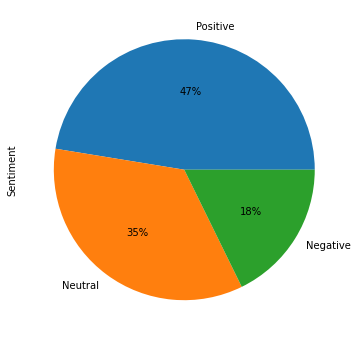

In [37]:
plt.figure(figsize=(8,6))
df.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16992 entries, 0 to 16999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   clean_text    16992 non-null  object 
 1   Sentiment     16992 non-null  object 
 2   totalwords    16992 non-null  int64  
 3   char_count    16992 non-null  int64  
 4   avg_word      16992 non-null  float64
 5   stopwords     16992 non-null  int64  
 6   hastags       16992 non-null  int64  
 7   numerics      16992 non-null  int64  
 8   upper         16992 non-null  int64  
 9   upper_letter  16992 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 1.9+ MB


In [39]:
df.head()

,clean_text,Sentiment,totalwords,char_count,avg_word,stopwords,hastags,numerics,upper,upper_letter
0,eye opener please ignore irony tweeting,Neutral,17,90,4.352941,10,0,0,0,3
1,agree true thing truth toast,Positive,24,109,3.583333,16,0,0,0,5
2,watching scary see media fucking mental health...,Negative,16,92,4.812500,5,0,0,1,6
3,check media pee morning whilst peeing 2 choice...,Positive,23,114,4.000000,11,0,1,0,2
4,watch see actually going share scary 100 true,Negative,17,89,4.294118,7,0,3,0,1


In [40]:
processed_features = df['clean_text'].values
labels = df['Sentiment'].values

In [41]:
processed_features

array(['eye opener please ignore irony tweeting',
       'agree true thing truth toast',
       'watching scary see media fucking mental health gen x', ...,
       'watching let see',
       'yes perfect time released netflix 3 main goals media companies 1',
       'impression actually sitting jail cell telling us discomfo'],
      dtype=object)

In [42]:
labels

array(['Neutral', 'Positive', 'Negative', ..., 'Neutral', 'Positive',
       'Negative'], dtype=object)

In [ ]:
# Convert sentiment labels to numerical values

sentiment_map = {'Positive': 1, 'Neutral': 2, 'Negative': 0}
df_train['Sentiment'] = df_train['Sentiment'].map(sentiment_map)

## Train-Test split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.3, random_state=0)

In [44]:
# Define the parameters
max_len=50    ## texts longer than 50 tokens will be truncated
trunc_type='post'
padding_type='post'
oov_token_1='<OOV>'# out of vocabulary token
vocab_size=500

In [45]:
X_train = [str(item) for item in X_train]

In [46]:
# Converting text into numerical representation - create a tokenizer and fit it on the training data
tokenizer = Tokenizer(num_words = vocab_size,    # maximum number of words to keep in the tokenizer's vocabulary
                      char_level = False,        # tokenization takes place on word level
                      oov_token = oov_token_1)
tokenizer.fit_on_texts(X_train)

In [47]:
X_train

['smartphone addiction across generations escape caught web',
 'yet seen think get yet another alarming biased account dan',
 'bastards',
 'think thing happen happened presentation google',
 'call someone works media really learning anything surprising doc',
 'although wish give long term solutions',
 'must watch netflix documentary knowing threat media ai influence ur v',
 'one cheekiest closing line ever',
 'three watch first need unplug media much possib',
 'product simplistic gradual change behaviour perception product',
 'two industries call customers users illegal drugs software edward tufta',
 'worldmentalhealthday join us thursday rose hosting open discussion',
 'scroll',
 'highly recommend',
 'starting',
 'fried brain',
 'secret online life web designer digital marketer media manager knew',
 'watch netflix truth behind media tech industry',
 'regulate facebook regulate google let us reclaim internet',
 'go watch right',
 'wow everyone watch netflix',
 'super recomendada seen d

In [48]:
word_index=tokenizer.word_index
total_words = len(word_index)
total_words

10327

In [49]:
word_index

{'<OOV>': 1,
 'watch': 2,
 'netflix': 3,
 'media': 4,
 'watching': 5,
 'watched': 6,
 'documentary': 7,
 'dilemma': 8,
 'product': 9,
 'must': 10,
 'everyone': 11,
 'know': 12,
 'people': 13,
 'like': 14,
 'amp': 15,
 'us': 16,
 'time': 17,
 'one': 18,
 'see': 19,
 'really': 20,
 'think': 21,
 'paying': 22,
 'facebook': 23,
 'recommend': 24,
 'go': 25,
 'tech': 26,
 'need': 27,
 'please': 28,
 'good': 29,
 'eye': 30,
 'phone': 31,
 'want': 32,
 'news': 33,
 'technology': 34,
 'get': 35,
 'highly': 36,
 '2': 37,
 '1': 38,
 'world': 39,
 'seen': 40,
 'right': 41,
 'kids': 42,
 'new': 43,
 'important': 44,
 'scary': 45,
 'irony': 46,
 'great': 47,
 'users': 48,
 'ourpact': 49,
 'finished': 50,
 'much': 51,
 'last': 52,
 'online': 53,
 'even': 54,
 'yet': 55,
 'two': 56,
 'would': 57,
 'matrix': 58,
 'thing': 59,
 'also': 60,
 'needs': 61,
 'interesting': 62,
 'call': 63,
 'make': 64,
 'way': 65,
 'well': 66,
 'going': 67,
 'mind': 68,
 'movie': 69,
 'notifications': 70,
 'use': 71,
 'alre

In [50]:
# converting the text data into numerical sequences & padding the sequence for same length
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)

In [51]:
training_sequences

[[1, 182, 1, 1, 1, 1, 1],
 [55, 40, 21, 35, 55, 192, 1, 1, 246, 1],
 [1],
 [21, 59, 1, 1, 1, 146],
 [63, 172, 418, 4, 20, 1, 313, 1, 135],
 [1, 485, 157, 226, 1, 1],
 [10, 2, 3, 7, 1, 275, 4, 166, 1, 1, 1],
 [18, 1, 1, 1, 113],
 [1, 2, 150, 27, 1, 4, 51, 1],
 [9, 1, 303, 102, 1, 388, 9],
 [56, 86, 63, 87, 48, 110, 98, 95, 254, 1],
 [1, 397, 16, 1, 1, 1, 328, 471],
 [1],
 [36, 24],
 [498],
 [1, 1],
 [1, 53, 91, 1, 1, 161, 1, 4, 1, 140],
 [2, 3, 118, 337, 4, 26, 297],
 [1, 23, 1, 146, 96, 16, 1, 120],
 [25, 2, 41],
 [92, 11, 2, 3],
 [398, 1, 40, 8, 3, 55, 3],
 [1, 108, 54, 226, 126, 137, 1, 132, 1],
 [1, 1, 7],
 [485, 1],
 [10, 2, 75, 1, 1, 1, 2, 1, 3],
 [66, 1, 1, 18, 1, 1, 1, 1, 1, 238, 27],
 [60, 1],
 [19, 223, 77, 329, 2, 3],
 [10, 2, 3],
 [1, 7, 1, 1],
 [1, 1, 1, 1, 389, 170, 433],
 [1, 1, 61, 189, 1],
 [2, 55, 6, 3, 25, 2, 419],
 [6, 111, 21, 1, 151],
 [124, 2, 3, 1, 116, 5, 1],
 [1, 1, 1, 219, 314, 1, 1, 330, 399, 70],
 [69, 111, 1, 1, 4, 144, 26, 1],
 [22, 9, 9, 142, 4, 118, 152]

In [52]:
training_padded

array([[  1, 182,   1, ...,   0,   0,   0],
       [ 55,  40,  21, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       ...,
       [  1,   1,  12, ...,   0,   0,   0],
       [109, 455,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   0,   0,   0]])

In [53]:
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

In [54]:
testing_sequences

[[28, 2, 346, 1, 430, 1, 1, 308],
 [1, 1, 1],
 [1, 1, 494],
 [20, 1, 8, 1, 323, 75, 376, 259, 1, 1, 1],
 [67, 2, 375, 345, 1, 1],
 [186, 1, 83, 14, 1, 146, 23, 125, 16, 1, 1],
 [17, 1, 1, 268],
 [1, 190, 1, 1, 1, 1, 41, 1, 1],
 [1, 1, 338, 1, 1, 1, 1, 187],
 [6, 70, 4, 139, 31, 135, 30],
 [1],
 [10, 2, 4, 1, 1, 1],
 [1, 1, 1, 1, 150, 1],
 [6, 283, 32, 25, 1, 1, 1, 1, 1, 161, 1],
 [105, 58, 12, 72, 58],
 [1, 1, 1, 1, 2, 3, 487, 1],
 [6, 1, 1, 1, 23, 246, 1, 272],
 [1, 1, 1, 1, 1, 163],
 [2, 8, 3, 12, 115, 13, 1, 274, 1],
 [3, 1, 1, 1, 51, 2, 1, 1],
 [24, 11, 25, 2, 3, 30, 114],
 [1, 226, 4, 1, 45, 12, 46, 1],
 [6, 263, 4, 359, 1, 1, 1, 1],
 [1, 1, 195, 106, 195, 335, 1],
 [6, 128, 164, 21, 44, 2],
 [6, 319, 52, 80, 12, 112, 183, 1, 2],
 [1, 2, 1],
 [204, 19, 365, 5, 202, 1],
 [18, 1, 151, 1, 55, 1, 64, 326, 51, 481],
 [409, 4, 1, 126, 30, 90, 1, 69, 335, 54, 1],
 [8, 1, 84],
 [46, 5, 3, 124, 1, 1, 1, 1, 317, 1],
 [1, 1, 1, 1, 306],
 [72, 1, 1, 412, 1, 1],
 [148, 118, 59, 118, 1, 28, 165

## Model building

In [55]:
# Model building and Dense Model Architecture
vocab_size=500
embedding_dim = 12 
drop_value = 0.2
##n_dense = 5

In [56]:
Model_rnn = Sequential()
Model_rnn.add(Embedding(vocab_size,
                        embedding_dim,
                        input_length = max_len))
Model_rnn.add(GlobalAveragePooling1D())
Model_rnn.add(Dense(50,activation='relu'))
Model_rnn.add(Dropout(drop_value))
Model_rnn.add(Dense(1,activation='softmax'))

In [57]:
Model_rnn.summary()
Model_rnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 12)            6000      
                                                                 
 global_average_pooling1d (G  (None, 12)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 50)                650       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,701
Trainable params: 6,701
Non-trainable params: 0
______________________________________________________

In [ ]:
num_epochs = 50
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = Model_rnn.fit(training_padded,
                        y_train,
                        epochs=num_epochs,
                        validation_data=(testing_padded,y_test),
                        callbacks =[early_stop],
                        verbose=2)

In [63]:
from tensorflow.keras.metrics import categorical_accuracy

# ... (previous code)

vocab_size = 500
embedding_dim = 12
drop_value = 0.2

Model_rnn = Sequential()
Model_rnn.add(Embedding(vocab_size,
                        embedding_dim,
                        input_length=max_len))
Model_rnn.add(GlobalAveragePooling1D())
Model_rnn.add(Dense(50, activation='relu'))
Model_rnn.add(Dropout(drop_value))
Model_rnn.add(Dense(3, activation='softmax'))  # Use 3 neurons and 'softmax' activation for multi-class classification

Model_rnn.summary()
Model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=[categorical_accuracy])

num_epochs = 50
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = Model_rnn.fit(training_padded,
                        y_train,
                        epochs=num_epochs,
                        validation_data=(testing_padded, y_test),
                        callbacks=[early_stop],
                        verbose=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 12)            6000      
                                                                 
 global_average_pooling1d_1   (None, 12)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 50)                650       
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 153       
                                                                 
Total params: 6,803
Trainable params: 6,803
Non-trainable params: 0
____________________________________________________

UnimplementedError: Graph execution error:

Detected at node 'Cast_16' defined at (most recent call last):
    File "C:\Users\Dell\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Dell\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\Dell\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\Dell\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Dell\anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\Dell\anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\Dell\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Dell\AppData\Local\Temp/ipykernel_7188/232726863.py", line 23, in <module>
      history = Model_rnn.fit(training_padded,
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1055, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1149, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\utils\metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 676, in update_state
      y_true = tf.cast(y_true, self._dtype)
Node: 'Cast_16'
Cast string to float is not supported
	 [[{{node Cast_16}}]] [Op:__inference_train_function_5413]

In [60]:
Model_rnn.evaluate(testing_padded,y_test)

UnimplementedError: Graph execution error:

Detected at node 'Cast_1' defined at (most recent call last):
    File "C:\Users\Dell\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Dell\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\Dell\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\Dell\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Dell\anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\Dell\anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\Dell\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Dell\AppData\Local\Temp/ipykernel_7188/2954853798.py", line 1, in <module>
      Model_rnn.evaluate(testing_padded,y_test)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 2072, in evaluate
      tmp_logs = self.test_function(iterator)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1852, in test_function
      return step_function(self, iterator)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1836, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1824, in run_step
      outputs = model.test_step(data)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1791, in test_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1149, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\utils\metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 676, in update_state
      y_true = tf.cast(y_true, self._dtype)
Node: 'Cast_1'
Cast string to float is not supported
	 [[{{node Cast_1}}]] [Op:__inference_test_function_1255]

In [61]:
from sklearn.metrics import classification_report

y_probs = Model_rnn.predict(training_padded)

# Convert the probabilities to predicted labels (0 or 1) using a threshold (e.g., 0.5)
threshold = 0.5
y_pred = (y_probs >= threshold).astype(int)

# Step 2: Generate the classification report
target_names = ['Class 0 (Negative)', 'Class 1 (Positive)']  # Replace with actual class names if available
report = classification_report(y_train, y_pred, target_names=target_names)

# Print the classification report
print("Classification Report:")
print(report)

372/372 [==============================] - 1s 899us/step


ValueError: Mix of label input types (string and number)